In [3]:
#TODO-

# shift it to hpc
# run the fp tree algo and check whether it works or not

# DONE -


In [4]:
from matplotlib import pyplot as plt
import datetime
import subprocess
import time

In [19]:
def compute_time(support_list, input_file):
    apriori_times = []
    fp_tree_times = []
    for support in support_list:
        #print('Support',support)
        t1= datetime.datetime.now()
        output = None
        try:
            output = subprocess.run(['fpgrowth/fpgrowth/src/fpgrowth', '-s'+ str(support), input_file, 'fp_tree_output'], capture_output=True, text = True, timeout = 60)
        except subprocess.TimeoutExpired:
            print("Timeout executing FP Tree Algo for Support = ", support)
        t2 = datetime.datetime.now()
        #print(output.stdout)
        print(t2-t1)
        try:
            output = subprocess.run(['python3', 'aprioriTime.py'], capture_output=True, text = True, timeout = 60)
        except subprocess.TimeoutExpired:
            print("Timeout executing Apriori Algo for Support = ", support)
        t3 = datetime.datetime.now()
        #print(output.stdout)
        print(t3-t2)
        apriori_times.append((t3-t2).total_seconds())
        fp_tree_times.append((t2-t1).total_seconds())
    return apriori_times, fp_tree_times


In [20]:
def plot_runtime(support_list, apriori_times, fp_tree_times):
    plt.plot(support_list, apriori_times,'r--', label = 'Apriori')
    plt.plot(support_list, fp_tree_times,'g', label = 'FP Tree')
    plt.xlabel('Support %')
    plt.ylabel('Run Time (sec)')
    plt.legend()
    plt.show()

0:00:42.468620
0:00:03.093517
0:00:44.095465
0:00:03.037197
0:00:43.484145
0:00:03.035301


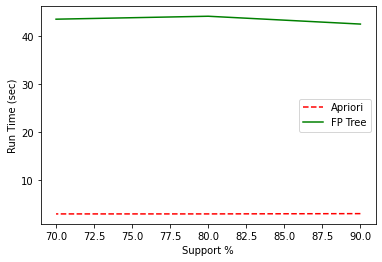

In [21]:
support_list = [90, 50, 25, 10, 5]
apriori_times, fp_tree_times = compute_time([90, 80, 70], 'webdocs.dat')
plot_runtime([90,80,70], apriori_times, fp_tree_times)